# Lab 3b: Graphs II

Lab associated with Module 3b: Graphs II

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/0n/s19df3pj3515r5_vrmr7rst80000gn/T/ipykernel_14177/1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

# Additional Import to colour output text.
import colorama
from colorama import Fore

# HeapDict for Task 3
import heapdict

# Time module for task 4
import time

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [5]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        self.estD = np.inf
        # Adding an aditional array to record the path
        self.path = []
        
    def hasOutNeighbor(self, v):
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self): # This function and the one below,
        return self.outNeighbors          # are no differnet to the two above. 
                                          # Other than the name, they are the same. 
    def getInNeighborsWithWeights(self):
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        return str(self.value) 
    

In [6]:
class Graph:
    
    def __init__(self):
        self.vertices = []

    def addVertex(self,n):
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b[0]) + "," + str(b[1]) + ") "
        ret += "\n"
        return ret
    

Now that we have incorporated the weights, let us devise a plan to generate the graph

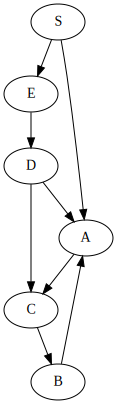

In [42]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [8]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [9]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)
#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)
#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)
#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)
#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)
#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )
#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)
#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

Second Example

In [10]:
G2 = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G2.addVertex( Node(i) )
    
V = G2.vertices

G2.addDiEdge( V[0], V[1], 3)
G2.addDiEdge( V[0], V[2] , 4)
G2.addDiEdge( V[2], V[1], -2)

In [11]:
print(G2)
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,A,3) (S,B,4) (B,A,-2) 

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,E,8) (S,A,10) (E,D,1) (A,C,2) (D,A,-4) (D,C,-1) (B,A,1) (C,B,-2) 



***

### Section 2: Dijkstra Algorithm

In [12]:
len(G.vertices)

6

In [13]:
# Helper to print the path of v. 
def printPath(v):
    path = []
    for i in v.path:
        path.append(i.value)
    return path


# This is only called if a shorter path is found.
def addPath(u, v):  # Current, Neighbour
    # Boolean value used to ensure no double ups.
    addV = True

    j = 0
    k = len(v.path)
    for i in u.path:  # If a shorter path exists, we copy it.
        if(j < k):
            if (i.value == v.path[j].value):
                j = j+1
            elif (i.value != v.path[j].value):
                v.path[j] = i
                j = j+1  
        else:
            v.path.append(i) 
        
    # Checking is the node is already in the path.        
    for i in v.path:
        if (i.value == v.value):
            addV = False
            
    # adding Node.self to the final position.
    if addV:
        v.path.append(v) 

    

def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        v.path = []  #Resetting the Path array.
        v.path.append(w) # Adding the root node as the start of the path.
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    sureVertices = []
    
    while len(unsureVertices) > 0:
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            if v in sureVertices:
                continue
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                addPath(u, v) # Adds shorter path.
        
        unsureVertices.remove(u)
        sureVertices.append(u)
        

# that's it!  Now each vertex holds estD which is its distance from w

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,E,8) (S,A,10) (E,D,1) (A,C,2) (D,A,-4) (D,C,-1) (B,A,1) (C,B,-2) 

S 0 PATH: ['S']
E 8 PATH: ['S', 'E']
A 5 PATH: ['S', 'E', 'D', 'A']
D 9 PATH: ['S', 'E', 'D']
B 5 PATH: ['S', 'E', 'D', 'A', 'C', 'B']
C 7 PATH: ['S', 'E', 'D', 'A', 'C']


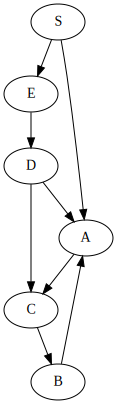

In [14]:
# TEST CASE 1
w = G.vertices[0]
dijkstra(w, G)

print(G)

for v in G.vertices:
    print(v.value, v.estD, 'PATH:', printPath(v))
    
dot

In [15]:
# TEST CASE 2

G2 = Graph()

for i in ['S', 'E', 'A', 'D', 'B', 'C', 'G', 'T', 'X', 'W']:
    G2.addVertex(Node(i))    # 4    5   6    7     8   9         
    
    V = G2.vertices

#dot.edge('S', 'E')
G2.addDiEdge( V[0], V[1], 8)
#dot.edge('S', 'A')
G2.addDiEdge( V[0], V[2] , 10)
#dot.edge('E', 'D')
G2.addDiEdge( V[1], V[3], 1)
#dot.edge('D', 'A')
G2.addDiEdge( V[3], V[2], -4)
#dot.edge('A', 'C')
G2.addDiEdge( V[2], V[5], 2)
#dot.edge('B', 'A')
G2.addDiEdge( V[4], V[2], 1 )
#dot.edge('D', 'C')
G2.addDiEdge( V[3], V[5], -1)
#dot.edge('C', 'B')
G2.addDiEdge( V[5], V[4], -2 )

G2.addDiEdge( V[6], V[5], 5)
G2.addDiEdge( V[7], V[4], -3 )
G2.addDiEdge( V[8], V[6], 3 )
G2.addDiEdge( V[5], V[9], 5 )
G2.addDiEdge( V[9], V[8], -2 )
G2.addDiEdge( V[2], V[7], 1 )

dot2 = Digraph()

dot2.edge('S', 'E')
dot2.edge('S', 'A')
dot2.edge('E', 'D')
dot2.edge('D', 'A')
dot2.edge('A', 'C')
dot2.edge('B', 'A')
dot2.edge('D', 'C')
dot2.edge('C', 'B')

dot2.edge('G', 'C')
dot2.edge('T', 'B')
dot2.edge('X', 'G')
dot2.edge('C', 'W')
dot2.edge('W', 'X')
dot2.edge('A', 'T')

Graph with:
	 Vertices:
	S,E,A,D,B,C,G,T,X,W,
	 Edges:
	(S,E,8) (S,A,10) (E,D,1) (A,C,2) (A,T,1) (D,A,-4) (D,C,-1) (B,A,1) (C,B,-2) (C,W,5) (G,C,5) (T,B,-3) (X,G,3) (W,X,-2) 

S 0 PATH: ['S']
E 8 PATH: ['S', 'E']
A 5 PATH: ['S', 'E', 'D', 'A']
D 9 PATH: ['S', 'E', 'D']
B 3 PATH: ['S', 'E', 'D', 'A', 'T', 'B']
C 7 PATH: ['S', 'E', 'D', 'A', 'C']
G 13 PATH: ['S', 'E', 'D', 'A', 'C', 'W', 'X', 'G']
T 6 PATH: ['S', 'E', 'D', 'A', 'T']
X 10 PATH: ['S', 'E', 'D', 'A', 'C', 'W', 'X']
W 12 PATH: ['S', 'E', 'D', 'A', 'C', 'W']


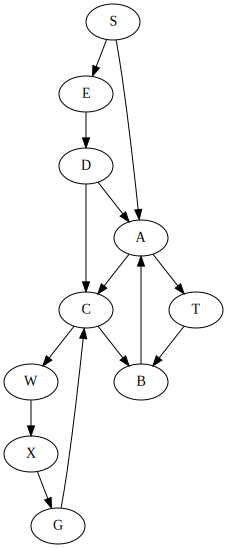

In [16]:
w1 = G2.vertices[0]
dijkstra(w1, G2)

print(G2)

for v in G2.vertices:
    print(v.value, v.estD, 'PATH:', printPath(v))
    
dot2

In [17]:
# TEST CASE 3

G3 = Graph()

for i in ['S', 'E', 'A', 'D', 'B', 'C', 'G', 'T', 'X', 'W']:
    G3.addVertex(Node(i))    # 4    5   6    7     8   9         
    
    V = G3.vertices

#dot.edge('S', 'E')
G3.addDiEdge( V[0], V[4], 8)
#dot.edge('S', 'A')
G3.addDiEdge( V[0], V[1] , 10)
#dot.edge('E', 'D')
G3.addDiEdge( V[1], V[2], 1)
#dot.edge('D', 'A')
G3.addDiEdge( V[3], V[9], -4)
#dot.edge('A', 'C')
G3.addDiEdge( V[2], V[5], 2)
#dot.edge('B', 'A')
G3.addDiEdge( V[4], V[5], 1 )
#dot.edge('D', 'C')
G3.addDiEdge( V[3], V[2], -1)
#dot.edge('C', 'B')
G3.addDiEdge( V[5], V[8], -2 )

G3.addDiEdge( V[6], V[7], 5) # Make -5 for neg Cycle
G3.addDiEdge( V[7], V[5], -3 )
G3.addDiEdge( V[8], V[4], 3 )
G3.addDiEdge( V[5], V[6], 5 )
G3.addDiEdge( V[9], V[2], -2 )
G3.addDiEdge( V[2], V[8], 1 )
G3.addDiEdge( V[0], V[3], 1 )


dot3 = Digraph()

dot3.edge('S', 'B')
dot3.edge('S', 'E')
dot3.edge('E', 'A')
dot3.edge('D', 'W') 
dot3.edge('A', 'C') 
dot3.edge('B', 'C')
dot3.edge('D', 'A')
dot3.edge('C', 'X') 

dot3.edge('G', 'T')
dot3.edge('T', 'C')
dot3.edge('X', 'B')
dot3.edge('C', 'G')
dot3.edge('W', 'A') 
dot3.edge('A', 'X')
dot3.edge('S', 'D')

Graph with:
	 Vertices:
	S,E,A,D,B,C,G,T,X,W,
	 Edges:
	(S,B,8) (S,E,10) (S,D,1) (E,A,1) (A,C,2) (A,X,1) (D,W,-4) (D,A,-1) (B,C,1) (C,X,-2) (C,G,5) (G,T,5) (T,C,-3) (X,B,3) (W,A,-2) 

S 0 PATH: ['S']
E 10 PATH: ['S', 'E']
A -5 PATH: ['S', 'D', 'W', 'A']
D 1 PATH: ['S', 'D']
B -1 PATH: ['S', 'D', 'W', 'A', 'X', 'B']
C -3 PATH: ['S', 'D', 'W', 'A', 'C']
G 2 PATH: ['S', 'D', 'W', 'A', 'C', 'G']
T 7 PATH: ['S', 'D', 'W', 'A', 'C', 'G', 'T']
X -4 PATH: ['S', 'D', 'W', 'A', 'X']
W -3 PATH: ['S', 'D', 'W']


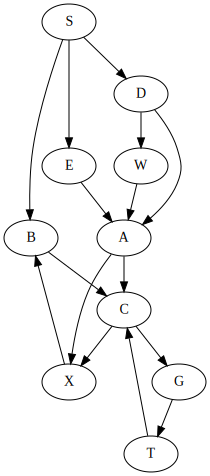

In [18]:
w2 = G3.vertices[0]
dijkstra(w2, G3)

print(G3)

for v in G3.vertices:
    print(v.value, v.estD, 'PATH:', printPath(v))
    
dot3

***

### <font color='red'> Activity 1: Code Reflections. </font>

Moving onto Dijkstra’s algorithm we can see it performs the following steps.
* Sets all vertices equal to infinity.
* Sets the value of the root passed to zero.
* Creates two arrays, 
 * the first “unsureVertices” is populated with all vertices of the graph.
 * The second, “sureVertices” is empty. 
* Enters a while loop on the condition that if there are nodes unexplored, i.e., unsureVertices > 0, repeat. 
 * Setting U equal to none. Used as an exit mechanism if there are no more updates to the minimum distance of the unsure vertices. 
 * Setting the minimum distance to infinity we enter a for loop to check each of the unsure vertices' minimum and estimated distances.
 * If the estimated difference is less than the minimum distance:
  * Updates the minimum distance to the estimated distance
  * Sets U equal to that node.
 * At this point, if U wasn’t updated, i.e., the if condition above wasn’t met, we exit the loop. If there was an update we continue. 
 * Lastly, we enter a for loop to update U’s outbound neighbours. 
  * If U’s estimated distance + the weight is less than the neighbour's estimated distance, set the neighbour's estimated distance to U’s plus the weight. 
 * We then remove U from the unsureVertices array and add U to the sureVertices array.


### <font color='red'> Activity 2: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [19]:
#### TODO ####
### Good Luck ###

def bellmanFord(w, G):
    # Setting each of the vertices est distance to infinity. 
    for v in G.vertices:
        v.estD = math.inf
        v.path = []  #Resetting the Path array.
        v.path.append(w) # Adding the root node as the start of the path.
        
    w.estD = 0 # setting the root est dist to zero. 
    n = len(G.vertices)  # setting the value of n = number of nodes.
    
    for i in range(1,n): # one less cycle than the number of nodes
        for u in G.vertices:
            for v, wt in u.getOutNeighborsWithWeights():
                if u.estD + wt < v.estD:
                    v.estD = u.estD + wt
                    addPath(u, v) # Adds shorter path.
    
    for u in G.vertices: # Detects Negative Cycle 
            for v, wt in u.getOutNeighborsWithWeights():
                if u.estD + wt < v.estD:
                    print(Fore.RED + 'Negative Cycle Detected\n -> ' + 
                          Fore.BLACK + 'Path Wieghts Unreliable')
        
                
    


Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,E,8) (S,A,10) (E,D,1) (A,C,2) (D,A,-4) (D,C,-1) (B,A,1) (C,B,-2) 

S 0 ['S']
E 8 ['S', 'E']
A 5 ['S', 'E', 'D', 'A']
D 9 ['S', 'E', 'D']
B 5 ['S', 'E', 'D', 'A', 'C', 'B']
C 7 ['S', 'E', 'D', 'A', 'C']


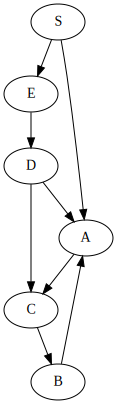

In [20]:
w4 = G.vertices[0]
bellmanFord(w4, G)

print(G)

for v in G.vertices:
    print(v.value, v.estD, printPath(v))
    
dot

In [21]:
dot4 = Digraph()

dot4.edge('S', 'E')
dot4.edge('S', 'A')
dot4.edge('E', 'D')
dot4.edge('D', 'A')
dot4.edge('A', 'C')
dot4.edge('B', 'A')
dot4.edge('D', 'C')
dot4.edge('C', 'B')

G4 = Graph()

for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G4.addVertex( Node(i) )
    
V = G4.vertices

#dot.edge('S', 'E')
G4.addDiEdge( V[0], V[1], 8)
#dot.edge('S', 'A')
G4.addDiEdge( V[0], V[2] , 10)
#dot.edge('E', 'D')
G4.addDiEdge( V[1], V[3], 1)
#dot.edge('D', 'A')
G4.addDiEdge( V[3], V[2], -4)
#dot.edge('A', 'C')
G4.addDiEdge( V[2], V[5], -2)
#dot.edge('B', 'A')
G4.addDiEdge( V[4], V[2], 1 )
#dot.edge('D', 'C')
G4.addDiEdge( V[3], V[5], -1)
#dot.edge('C', 'B')
G4.addDiEdge( V[5], V[4], 2 ) # Make -2 for negative cycle 

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,E,8) (S,A,10) (E,D,1) (A,C,-2) (D,A,-4) (D,C,-1) (B,A,1) (C,B,2) 

S 0 ['S']
E 8 ['S', 'E']
A 5 ['S', 'E', 'D', 'A']
D 9 ['S', 'E', 'D']
B 5 ['S', 'E', 'D', 'A', 'C', 'B']
C 3 ['S', 'E', 'D', 'A', 'C']


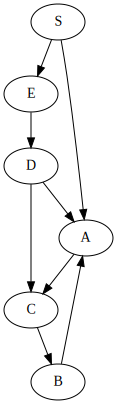

In [22]:
w5 = G4.vertices[0]
bellmanFord(w5, G4)

print(G4)

for v in G4.vertices:
    print(v.value, v.estD, printPath(v))
    
dot4

Graph with:
	 Vertices:
	S,E,A,D,B,C,G,T,X,W,
	 Edges:
	(S,B,8) (S,E,10) (S,D,1) (E,A,1) (A,C,2) (A,X,1) (D,W,-4) (D,A,-1) (B,C,1) (C,X,-2) (C,G,5) (G,T,5) (T,C,-3) (X,B,3) (W,A,-2) 

BellmanFord S 0 ['S']
BellmanFord E 10 ['S', 'E']
BellmanFord A -5 ['S', 'D', 'W', 'A']
BellmanFord D 1 ['S', 'D']
BellmanFord B -2 ['S', 'D', 'W', 'A', 'C', 'X', 'B']
BellmanFord C -3 ['S', 'D', 'W', 'A', 'C']
BellmanFord G 2 ['S', 'D', 'W', 'A', 'C', 'G']
BellmanFord T 7 ['S', 'D', 'W', 'A', 'C', 'G', 'T']
BellmanFord X -5 ['S', 'D', 'W', 'A', 'C', 'X']
BellmanFord W -3 ['S', 'D', 'W']

Dijkstra S 0 ['S']
Dijkstra E 10 ['S', 'E']
Dijkstra A -5 ['S', 'D', 'W', 'A']
Dijkstra D 1 ['S', 'D']
Dijkstra B -1 ['S', 'D', 'W', 'A', 'X', 'B']
Dijkstra C -3 ['S', 'D', 'W', 'A', 'C']
Dijkstra G 2 ['S', 'D', 'W', 'A', 'C', 'G']
Dijkstra T 7 ['S', 'D', 'W', 'A', 'C', 'G', 'T']
Dijkstra X -4 ['S', 'D', 'W', 'A', 'X']
Dijkstra W -3 ['S', 'D', 'W']


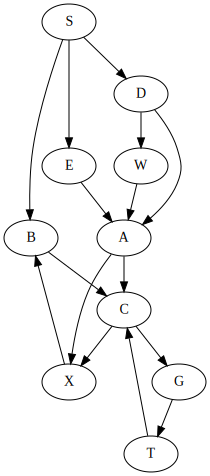

In [23]:
w6 = G3.vertices[0]
bellmanFord(w6, G3)

print(G3)

for v in G3.vertices:
    print('BellmanFord', v.value, v.estD, printPath(v))
print('')
    
dijkstra(w6, G3)

for v in G3.vertices:
    print('Dijkstra', v.value, v.estD, printPath(v))
    
dot3

### <font color='red'> Activity 3: Have a look at the following Python's implementation of heap (priority Queues): HeapDict, and try to convert our Dijkstra's implementation to use this heap data structure instead. </font>

In [24]:
### TODO ###
### Good Luck ###

# Dijkstra's Algorithm implemented using a heap rather than an array.
def dijkstraHeap(w, G):
    
    # Creating the Heap Dict
    unvistedVertices = heapdict.heapdict()
    
    for v in G.vertices:
        v.estD = math.inf
        v.status = 'unvisited' #using status to eliminate arrays
        v.path = []  #Resetting the Path array.
        v.path.append(w) # Adding the root node as the start of the path.
         
    w.estD = 0
    unvistedVertices[w] = w.estD
    
    while True:    
        if len(unvistedVertices.keys())==0:
            return 
        u = unvistedVertices.popitem() # Returns the element with the lowest estD value.
        u = u[0]
       
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v.status!='visited':            
                if u.estD + wt < v.estD:
                    v.estD = u.estD + wt
                    addPath(u, v)
                unvistedVertices[v] = v.estD
                
        u.status = 'visited'


Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,E,8) (S,A,10) (E,D,1) (A,C,2) (D,A,-4) (D,C,-1) (B,A,1) (C,B,-2) 

S 0 ['S']
E 8 ['S', 'E']
A 5 ['S', 'E', 'D', 'A']
D 9 ['S', 'E', 'D']
B 5 ['S', 'E', 'D', 'A', 'C', 'B']
C 7 ['S', 'E', 'D', 'A', 'C']


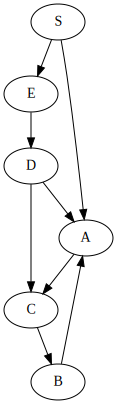

In [25]:
# Test Case 1 - Dijkstra Heap

w4 = G.vertices[0]
dijkstraHeap(w4, G)

print(G)

for v in G.vertices:
    print(v.value, v.estD, printPath(v))
    
dot

Graph with:
	 Vertices:
	S,E,A,D,B,C,G,T,X,W,
	 Edges:
	(S,B,8) (S,E,10) (S,D,1) (E,A,1) (A,C,2) (A,X,1) (D,W,-4) (D,A,-1) (B,C,1) (C,X,-2) (C,G,5) (G,T,5) (T,C,-3) (X,B,3) (W,A,-2) 

S 0 ['S']
E 10 ['S', 'E']
A -5 ['S', 'D', 'W', 'A']
D 1 ['S', 'D']
B -1 ['S', 'D', 'W', 'A', 'X', 'B']
C -3 ['S', 'D', 'W', 'A', 'C']
G 2 ['S', 'D', 'W', 'A', 'C', 'G']
T 7 ['S', 'D', 'W', 'A', 'C', 'G', 'T']
X -4 ['S', 'D', 'W', 'A', 'X']
W -3 ['S', 'D', 'W']


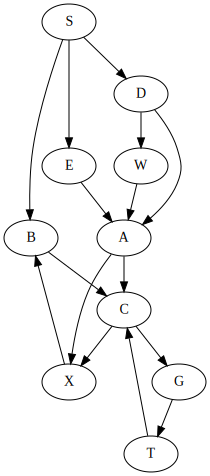

In [26]:
# Test Case 2 - Dijkstra Heap

w4 = G3.vertices[0]
dijkstraHeap(w4, G3)

print(G3)

for v in G3.vertices:
    print(v.value, v.estD, printPath(v))
    
dot3

***

### Section 4: Dynammc Programming

We discussed Fibonacci numbers sequence as a good example of Dynamic Programming. Let us have a look at its computation.

In [27]:
def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)
                

In [28]:
n = 35
t0 = time.time()
tot = Fibonacci(n)
t1 = time.time()

time_1 = t1 - t0
time_1_milli = time_1 * 1000

print(' Total Sum:', tot)

 Total Sum: 14930352


In [29]:
def fasterFibonacci(n):
    
    F = [1 for i in range(n+1)]

    for i in range(2,n+1):
        F[i] = F[i-1] + F[i-2]
        
    return F[n]

In [30]:
n2 = 700
t0 = time.time()
tot2 = fasterFibonacci(n2)
t1 = time.time()

time_2 = t1 - t0
time_2_milli = time_2 * 1000

print(' Total Sum:', tot2)

 Total Sum: 141530751622060734789349637541611806906560581814825656065057782655897254318057662142341135314844769422903905867863877139246681886097354486547763701


In [31]:
def Fibonacci_topdown(n,F):
    
    if F[n] != None:
        return F[n]
    
    F[n] = Fibonacci_topdown(n-1, F) + Fibonacci_topdown(n-2, F)
    return F[n]

In [32]:
n3 = 700
F = [None]*(n3+1)
F[0], F[1] = 1,1

t0 = time.time()
tot3 = Fibonacci_topdown(n3, F)
t1 = time.time()

time_3 = t1 - t0
time_3_milli = time_3 * 1000

print(' Total Sum:', tot3)


 Total Sum: 141530751622060734789349637541611806906560581814825656065057782655897254318057662142341135314844769422903905867863877139246681886097354486547763701


In [33]:
print('Recursive Fibonacci O(2^n) with n =', n)
print(' Total Sum:', tot)
print(' Total Time:', time_1, 'seconds')
print(' Total Time:', time_1_milli, 'milliseconds\n')

print('Iterative Fibonacci O(n) with n =', n2)
print(' Total Sum:', tot2)
print(' Total Time:', time_2, 'seconds')
print(' Total Time:', time_2_milli, 'milliseconds\n')

print('Topdown Fibonacci O(n) with n =', n3)
print(' Total Sum:', tot3)
print(' Total Time:', time_3, 'seconds')
print(' Total Time:', time_3_milli, 'milliseconds')

Recursive Fibonacci O(2^n) with n = 35
 Total Sum: 14930352
 Total Time: 2.73593807220459 seconds
 Total Time: 2735.93807220459 milliseconds

Iterative Fibonacci O(n) with n = 700
 Total Sum: 141530751622060734789349637541611806906560581814825656065057782655897254318057662142341135314844769422903905867863877139246681886097354486547763701
 Total Time: 0.00019502639770507812 seconds
 Total Time: 0.19502639770507812 milliseconds

Topdown Fibonacci O(n) with n = 700
 Total Sum: 141530751622060734789349637541611806906560581814825656065057782655897254318057662142341135314844769422903905867863877139246681886097354486547763701
 Total Time: 0.0006546974182128906 seconds
 Total Time: 0.6546974182128906 milliseconds


Have a look at above different ways to compute Fibonacci numbers. Report on their running time. Make sure you know the difference between them.

***

### <font color='red'> Activity 4: Write a brief report comparing 'Dynamic Programming' with 'Divide-and-Conquer' strategy? (If you are not familiar with Divide-and-Conquer strategy - revisit Quick Sort or Binary Search algorithms. You should address why we can not use DP for Quick Sort or Binary Sort). </font>

A Divide and Conquer (DC) algorithm recursively separates a problem into two or more subproblems until they reach a base case before solving and returning the result. Dynamic Programming (DP) is a design paradigm that helps us efficiently solve overlapping subproblems and optimal substructure property problems.

Broadly speaking, the difference between them is that Divide and Conquer is a method of breaking a problem into smaller parts and solving each of those parts separately, while Dynamic Programming is a method of solving large problems by breaking them into smaller pieces. Simply put, DC is about solving a single problem and DP is about solving a series of problems. 

Defining some of the key differences and relating them to the Fibonacci examples in this week’s notebook. Results of the algorithm comparisons are below for reference. 

•	DC is a form of recursive programming and DP is not, although DP may incorporate recursion into the overall solution. Ex. ‘faster Fibonacci’.
•	DC is often twice as time-consuming as DP because each problem is individually addressed whereas with DP the answers to previous problems are recorded and used to solve the current problem. Again, this is evidenced by the processing speeds of each of the Fibonacci algorithms, the fastest by a factor of at least 2, is the ‘faster Fibonacci’ algorithm, thousands of times faster than its purely recursive counterpart.
•	DP is faster than DC simply because it is more efficient, as discussed in the above point.
•	DC uses a top-down approach, while DP uses a bottom-up approach. Again, illustrated by the Fibonacci algorithms, the recursive and of course top-down are top-down approaches whereas the iterative ‘faster Fibonacci’ is a bottom-up solution.  

To answer the question “why can’t use DP for a quick sort or binary sort algorithm”, yet we can for Fibonacci. Well, the answer is simple and quite obvious when you consider how each of them works recursively. Both quick and binary sort algorithms don’t have overlapping sub-problems where Fibonacci does. Overlapping sub-problems is one of two core properties a problem must have to be a candidate for DP. The other is having an Optimal sub-structure, this refers to the fact the sub-problem or sub-sub-problem’s solutions can be combined to obtain the solution of the overall problem. Or even solutions to other sub-problems.   

In summary, both DP and DC have the use cases and can form part of the joint solution. DP is far more efficient than DC but not all DC problems can be approached from a DP perspective so its important to always check for the two key properties of DP when looking to solve a computational problem.


### <font color='red'> Activity 5: You are running up a staircase with a total of n steps. You can hop either 1 step, 2 steps or 3 steps at at time. Write a DP program to determine how many possible ways you can run up the stairs? (Hint: Start with a recursive solution, and then later move to top-down approach of DP). </font>

In [34]:
### TODO ###
### Good Luck ###

# Stair hopping recursive 
# Recursize call from n back to the hopping values 1, 2, and 3. 
def stair_recursive(n):
    # Base Case 
    if ( n < 0 ):
        return 0
    elif (n == 0):
        return 1
    else: 
        return stair_recursive(n - 1) + stair_recursive(n - 2) + stair_recursive(n - 3)
        

# Stair hopping dynamic (bottom up) 
def stair_dynamic(n):
    # Initialising an array for size n+2 to store the results 
    # and pre-loading it with the base cases, 1, 1, 2.
    result = [0] * (n + 1)
    result[0] = 1
    result[1] = 1
    result[2] = 2
    
    # Starting from position 3, adding the results to the array.
    for i in range(3, n+1):
        # starting with pos 3, and adding the 3 previous results to it.
        result[i] = result[i - 1] + result[i - 2] + result[i - 3]
 
    return result[n]


In [35]:
n=28
r0 = time.time()
s_recursive = stair_recursive(n)
r1 = time.time()

print('Recursive soloution total time:', (r1-r0)*1000, 
      'millisecinds\n Result for:', n, 'stairs:',s_recursive)

Recursive soloution total time: 5411.318063735962 millisecinds
 Result for: 28 stairs: 15902591


In [36]:
d0 = time.time()
s_dynamic = stair_dynamic(n)
d1 = time.time()
print('Dynamic soloution total time:', (d1-d0)*1000, 
      'millisecinds\n Result for:', n, 'stairs:',s_dynamic)

Dynamic soloution total time: 0.050067901611328125 millisecinds
 Result for: 28 stairs: 15902591


### <font color='red'> Activity 6: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [37]:
#### TODO ####
### Good Luck ### [middle][inner] = [middle][outer] + [outer][inner]

def floydWarshall(G):
    
    # Creating a dict to hold the matrix, key = node, value = weight.
    dist_matrix = {}  
    n = len(G.vertices) # Setting n = number of vertices.
    
    for v in G.vertices:
        dist_matrix[v] = [np.inf]*n # For each vertex, creating a array of size n.
        dist_matrix[v][G.vertices.index(v)] = 0 # Setting the diagnals to zero. 
        
        # Adding the weights we know / have. 
        for u, wt in v.getOutNeighborsWithWeights():
            dist_matrix[v][G.vertices.index(u)] = wt
  
    # Update the matrix with the shortest paths found. 
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                if dist_matrix[G.vertices[j]][k] > dist_matrix[G.vertices[j]][i] + dist_matrix[G.vertices[i]][k]:
                    dist_matrix[G.vertices[j]][k] = dist_matrix[G.vertices[j]][i] + dist_matrix[G.vertices[i]][k]
    
    # Checking for negative cycles. 
    for v in G.vertices:
        if dist_matrix[v][G.vertices.index(v)] != 0:
            print(Fore.RED + 'Negative Cycle Detected\n -> ' + 
                          Fore.BLACK + 'Path Wieghts Unreliable')
    
    return dist_matrix


Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,E,8) (S,A,10) (E,D,1) (A,C,2) (D,A,-4) (D,C,-1) (B,A,1) (C,B,-2) 

  ['S', 'E', 'A', 'D', 'B', 'C']
S: [0, 8, 5, 9, 5, 7] 
E: [inf, 0, -3, 1, -3, -1] 
A: [inf, inf, 0, inf, 0, 2] 
D: [inf, inf, -4, 0, -4, -2] 
B: [inf, inf, 1, inf, 0, 3] 
C: [inf, inf, -1, inf, -2, 0] 


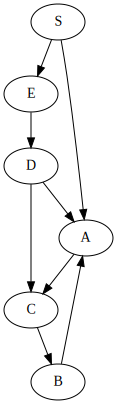

In [38]:
# Floyd-Warshall Test Case 1
dist = floydWarshall(G)

print(G)
print(' ',[v.value for v in G.vertices])
for v in G.vertices:
    print(f'{v}: {dist[v]}','')
        
dot

In [39]:

G6 = Graph()
         # 0    1    2    3    4    5
for i in ['S', 'E', 'A', 'B', 'C', 'X']:
    G6.addVertex(Node(i))            
    
    V = G6.vertices

#dot.edge('S', 'B')
G6.addDiEdge( V[0], V[3], 8)
#dot.edge('E', 'S')
G6.addDiEdge( V[1], V[0] , 10)
#dot.edge('A', 'E')
G6.addDiEdge( V[2], V[1], 1)
#dot.edge('C', 'A')
G6.addDiEdge( V[4], V[2], 2)
#dot.edge('B', 'C')
G6.addDiEdge( V[3], V[4], 2)
#dot.edge('C', 'X')
G6.addDiEdge( V[4], V[5], -1)
G6.addDiEdge( V[5], V[0], 3)

dot6 = Digraph()
dot6.edge('S', 'B')
dot6.edge('E', 'S')
dot6.edge('A', 'E')
dot6.edge('C', 'A') 
dot6.edge('B', 'C')
dot6.edge('C', 'X') 
dot6.edge('X', 'S') 


Graph with:
	 Vertices:
	S,E,A,B,C,X,
	 Edges:
	(S,B,8) (E,S,10) (A,E,1) (B,C,2) (C,A,2) (C,X,-1) (X,S,3) 

  ['S', 'E', 'A', 'B', 'C', 'X']
S: [0, 13, 12, 8, 10, 9] 
E: [10, 0, 22, 18, 20, 19] 
A: [11, 1, 0, 19, 21, 20] 
B: [4, 5, 4, 0, 2, 1] 
C: [2, 3, 2, 10, 0, -1] 
X: [3, 16, 15, 11, 13, 0] 


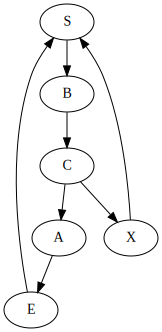

In [40]:
# Floyd-Warshall Test Case 2
dist = floydWarshall(G6)

print(G6)
print(' ',[v.value for v in G6.vertices])
for v in G6.vertices:
    print(f'{v}: {dist[v]}','')
        
dot6

***

***